# Stock Prediction

We are using historical data from yahoo's finance api's to predict the stock prick for a given stock symbol, given other stock symbols. In addition to the normal pandas and numpy libraries, We are also using Prophet (https://facebook.github.io/prophet/docs/quick_start.html), which is a forecasting library released by the Facebook core datascience team. It implements a procedure for forecasting trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.


In [35]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

Now we load the data. We can specify the start and end dates and also the stock symbol.

In [36]:
import pandas_datareader.data as web
import datetime

# change this to your desired stock symbol to get results
stockSymbol = 'NFLX'
# Considering data from t2010 to 2019
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 1, 1)

# we now get data for that stock symbol from yahoo finance api
df = web.DataReader(stockSymbol, 'yahoo', start, end)
print(df.head())

                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2010-01-04  7.961429  7.565714  7.931428  7.640000  17239600.0   7.640000
2010-01-05  7.657143  7.258572  7.652857  7.358572  23753100.0   7.358572
2010-01-06  7.672857  7.197143  7.361429  7.617143  23290400.0   7.617143
2010-01-07  7.757143  7.462857  7.731429  7.485714   9955400.0   7.485714
2010-01-08  7.742857  7.465714  7.498571  7.614286   8180900.0   7.614286


In [37]:
# Now we can get an array of only the closing values and plot the data
close = df['Close']

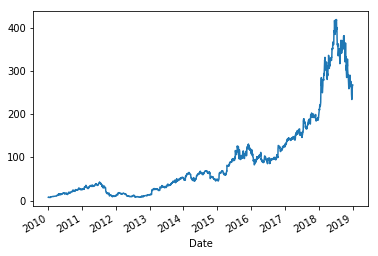

In [38]:
#Plotting the data
close.plot();

In [39]:
# We now reformat the data frame to have columns 'ds' and 'y' with the dates and values respectively which is needed
# by prophet. We also take the log of the values to get more managable values
close_df = close.reset_index().rename(columns={'Date':'ds', 'Close':'y'})
close_df['y'] = np.log(close_df['y'])

In [42]:
# Now we create the prophet model with daily seasonality to be true
model = Prophet(daily_seasonality=True)
model.fit(close_df)
# 5* 365 = 1825.Forecasting for 5 years from now. 
future = model.make_future_dataframe(periods=1825) 
forecast = model.predict(future)
print(forecast)

             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-01-04  2.019724    1.729942    2.038285     2.019724     2.019724   
1    2010-01-05  2.023846    1.724401    2.039447     2.023846     2.023846   
2    2010-01-06  2.027968    1.742946    2.058219     2.027968     2.027968   
3    2010-01-07  2.032090    1.745115    2.068298     2.032090     2.032090   
4    2010-01-08  2.036212    1.758417    2.048091     2.036212     2.036212   
5    2010-01-11  2.048578    1.777435    2.102111     2.048578     2.048578   
6    2010-01-12  2.052700    1.798607    2.124570     2.052700     2.052700   
7    2010-01-13  2.056821    1.797419    2.113818     2.056821     2.056821   
8    2010-01-14  2.060943    1.809755    2.142221     2.060943     2.060943   
9    2010-01-15  2.065065    1.826714    2.137243     2.065065     2.065065   
10   2010-01-19  2.081553    1.883768    2.189223     2.081553     2.081553   
11   2010-01-20  2.085675    1.891991    2.199374   

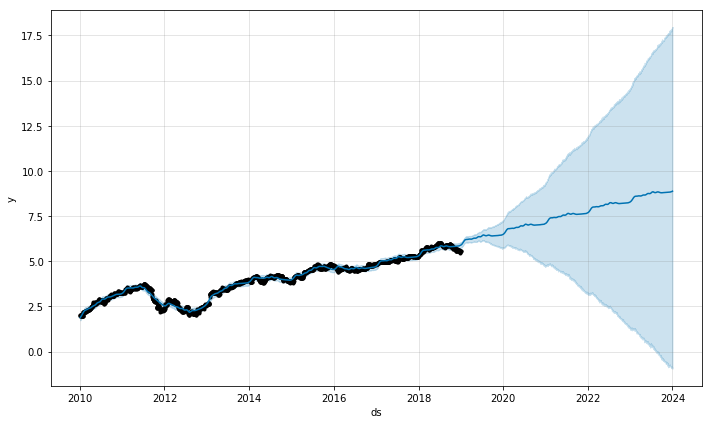

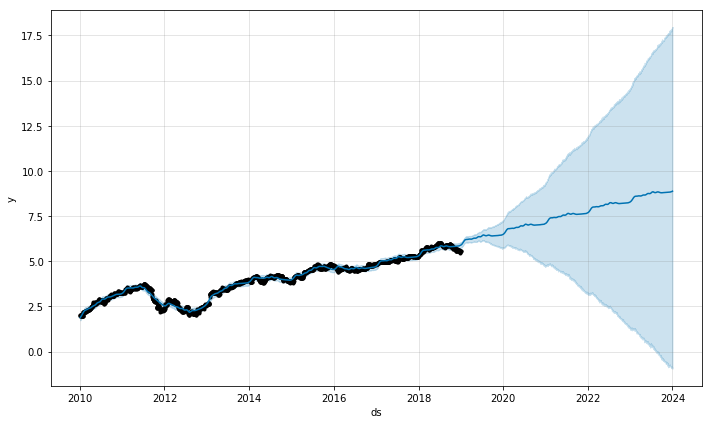

In [43]:
model.plot(forecast)

# We can now do a performance evaluation of the result obtained from this.

In [45]:
# to do an evaluation, we join the dataframe df with the forecast obtained. We transform it by dropping na and just taking 
# the yhat, upper, lower and close values.
data = forecast.set_index('ds').join(df)
data = data[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(500)
data['yhat']=np.exp(data.yhat)
data['yhat_upper']=np.exp(data.yhat_upper)
data['yhat_lower']=np.exp(data.yhat_lower)

In [46]:
data

,Close,yhat,yhat_upper,yhat_lower
ds,,,,
2017-01-06,131.070007,114.679300,131.835107,96.492251
2017-01-09,130.949997,116.685963,135.865336,100.714747
2017-01-10,129.889999,117.579759,138.037388,101.708998
2017-01-11,130.500000,118.167084,137.682220,99.769448
2017-01-12,129.179993,119.477904,140.489861,101.755617
2017-01-13,133.699997,120.119127,142.636646,101.624446
2017-01-17,132.889999,124.369699,144.984335,107.347574
2017-01-18,133.259995,125.279105,145.795228,107.011256
2017-01-19,138.410004,126.944769,148.426539,108.468855


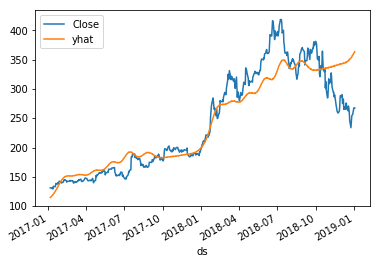

In [47]:
# we can now plot the actual values with predicted ones
data[['Close', 'yhat']].plot()


# Average errors is as below

In [48]:
AE = (data.yhat - data.Close)
print(AE.describe())

count    500.000000
mean      -1.255792
std       31.812232
min     -100.616987
25%      -16.470317
50%        1.334983
75%       10.789524
max      119.173990
dtype: float64


# The R2 score , Mean squared error and Mean absolute error is asbelow

In [49]:
r2_score(data.Close, data.yhat)


0.8613139983370754

In [50]:
mean_squared_error(data.Close, data.yhat)

1011.5710595526581

In [51]:
mean_absolute_error(data.Close, data.yhat)

22.395376137336456

# Forecasting with y upper and y lower confidence

Text(0.5, 0, 'Date')

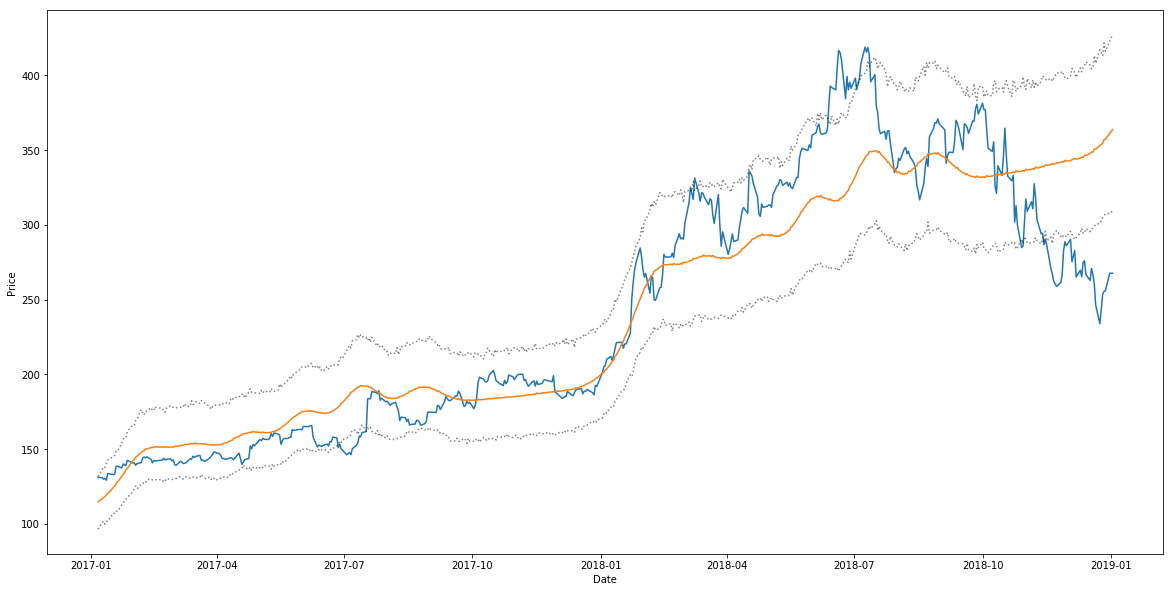

In [52]:
plt.rcParams['figure.figsize']=(20,10)
fig, ax1 = plt.subplots()
ax1.plot(data.Close)
ax1.plot(data.yhat)
ax1.plot(data.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(data.yhat_lower, color='black',  linestyle=':', alpha=0.5)
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')